<a href="https://colab.research.google.com/github/prawizard/CE888_Repo/blob/main/Project/TweetEval_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Constants

In [2]:
VOCAB_SIZE=2500

#Access Data from the Files

In [3]:
stream=open("train_text.txt")
tweets=stream.readlines()
stream.close()
# print(tweets)

In [4]:
len(tweets)

11916

In [5]:
for i in range(len(tweets)):
  if tweets[i].find('@user')!=-1:
    # tweets[i] = tweets[i].replace('@user',"")
    tweets[i]=re.sub('@user', '', tweets[i])
# tweets    
# Words like effing converted to VetsResistSquadron

In [6]:
# tweetStrings = [ tw for tw in tweetStrings if tw!='' and tw!=' '] 

In [7]:
stream=open("train_labels.txt")
tweetsLabels=stream.readlines()
stream.close()

In [8]:
labels=[0]*len(tweetsLabels)
for i in range(len(tweetsLabels)):
  if tweetsLabels[i].find('\n')!=-1:
    # tweets[i] = tweets[i].replace('@user',"")
    labels[i]=int(re.sub('\n', '', tweetsLabels[i]))
# labels    
# Words like effing converted to VetsResistSquadron

In [9]:
len(labels)

11916

#Convert to DataFrame

In [10]:
rows=[]
rowIndices=[]
for i in range(len(tweets)):
  rows.append({"TWEET":tweets[i], "CATEGORY":labels[i]})
  rowIndices.append(i+1)
df=pd.DataFrame(rows, index=rowIndices)

In [11]:
print(df.head())
print(df.shape)
type(df.CATEGORY)

                                               TWEET  CATEGORY
1   Bono... who cares. Soon people will understan...         0
2   Eight years the republicans denied obama’s pi...         1
3   Get him some line help. He is gonna be just f...         0
4                         She is great. Hi Fiona! \n         0
5   She has become a parody unto herself? She has...         1
(11916, 2)


pandas.core.series.Series

#Check for missing values or null tweets

In [12]:
df.TWEET.isnull().values.any()

False

In [13]:
df.CATEGORY.isnull().values.any()

False

In [14]:
#Check if there are empty tweets(With string length zero).
(df.TWEET.str.len()==0).any()

False

#Offensive and non-offensive counts

In [15]:
df.CATEGORY.value_counts()

0    7976
1    3940
Name: CATEGORY, dtype: int64

In [16]:
num_offensive=df.CATEGORY.value_counts()[1]
num_nonoffensive=df.CATEGORY.value_counts()[0]

<function matplotlib.pyplot.show>

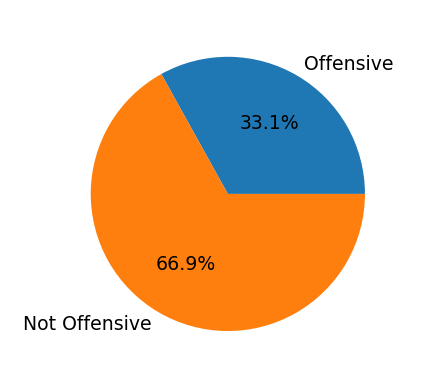

In [17]:
categoryNames=['Offensive', 'Not Offensive']
sizes=[num_offensive, num_nonoffensive]
plt.figure(figsize=(2,2), dpi=227)
plt.pie(sizes, labels=categoryNames, textprops={'fontsize':6}, startangle=0, autopct='%1.1f%%')
plt.show

#NLP

###Text pre-processing

In [18]:
st="Is the tweet Offensive or not?"
st.lower()

'is the tweet offensive or not?'

###Download NLTK Resources(Tokenizer & stopwords)

In [19]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

###Tokenize

In [20]:
word_tokenize(st.lower())

['is', 'the', 'tweet', 'offensive', 'or', 'not', '?']

###Remove stop words. Word stemming

In [21]:
stop_words=set(stopwords.words('english'))

In [22]:
words=word_tokenize(st.lower())
filtered_words=[]
# stemmer=PorterStemmer()
stemmer=SnowballStemmer('english')
for word in words:
  if word not in stop_words:
    stemmed_word=stemmer.stem(word)
    filtered_words.append(stemmed_word)
filtered_words

['tweet', 'offens', '?']

###Removing punctuations

In [23]:
words=word_tokenize(st.lower())
filtered_words=[]
# stemmer=PorterStemmer()
stemmer=SnowballStemmer('english')
for word in words:
  if word not in stop_words and word.isalpha():
    stemmed_word=stemmer.stem(word)
    filtered_words.append(stemmed_word)
filtered_words

['tweet', 'offens']

###Create a function for cleaning tweets

In [24]:
def clean_tweets(tweet, stemmer=PorterStemmer(), stop_words=set(stopwords.words('english'))):
  words=word_tokenize(tweet.lower())
  filtered_words=[]
  for word in words:
    if word not in stop_words and word.isalpha():
      stemmed_word=stemmer.stem(word)
      filtered_words.append(stemmed_word)
  return filtered_words

In [25]:
clean_tweets(st)

['tweet', 'offens']

In [26]:
len(df)
type(df.TWEET[0:5])

pandas.core.series.Series

In [27]:
# %%time
tweetsList=df.TWEET
nestedList=tweetsList.apply(clean_tweets)
nestedList[0:5]

1    [bono, care, soon, peopl, understand, gain, no...
2    [eight, year, republican, deni, obama, pick, b...
3    [get, line, help, gon, na, fine, game, went, c...
4                                   [great, hi, fiona]
5    [becom, parodi, unto, certainli, taken, heat, ...
Name: TWEET, dtype: object

In [28]:
%%time
flatList=[item for subitem in nestedList for item in subitem]
len(flatList)

CPU times: user 6.61 ms, sys: 968 µs, total: 7.58 ms
Wall time: 7.51 ms


In [29]:
tw_id_offensive=df[df.CATEGORY==1].index
tw_id_non_offensive=df[df.CATEGORY==0].index

In [30]:
tw_nested_off=nestedList.loc[tw_id_offensive]
tw_nested_non_off=nestedList.loc[tw_id_non_offensive]

In [31]:
flat_off=[item for subitem in tw_nested_off for item in subitem]
flat_non_off=[item for subitem in tw_nested_non_off for item in subitem]
off_words=pd.Series(flat_off).value_counts()
non_off_words=pd.Series(flat_non_off).value_counts()

# 5 most common words in offensive tweets
off_words[0:5]

liber      572
gun        491
like       446
control    400
peopl      341
dtype: int64

In [32]:
# 5 most common words in non-offensive tweets
non_off_words[0:5]

liber      902
gun        889
antifa     768
control    715
conserv    689
dtype: int64

In [33]:
print("Off ",off_words.shape[0]," non-off ",non_off_words.shape[0])

Off  6797  non-off  9906


In [34]:
stemmed_nested_list=df.TWEET.apply(clean_tweets)
flat_stemmed_list=[item for subitem in stemmed_nested_list for item in subitem]
unique_words=pd.Series(flat_stemmed_list).value_counts()
print("Number of unique words ",unique_words.shape[0])
unique_words.head()

Number of unique words  12337


liber      1474
gun        1380
control    1115
like       1068
antifa     1047
dtype: int64

In [35]:
frequent_words=unique_words[0:VOCAB_SIZE]
frequent_words[0:10]

liber      1474
gun        1380
control    1115
like       1068
antifa     1047
conserv     942
maga        908
peopl       840
get         803
know        657
dtype: int64

In [36]:
word_ids=list(range(0,VOCAB_SIZE))
vocab=pd.DataFrame({"VOCAB_WORD":frequent_words.index.values}, index=word_ids)
vocab.index.name="WORD_ID"
vocab.head()

,VOCAB_WORD
WORD_ID,
0,liber
1,gun
2,control
3,like
4,antifa


In [37]:
# saved file

#Generate feature and sparse matrix

###Creating a dataframe with one word per column

In [38]:
type(stemmed_nested_list)

pandas.core.series.Series

In [39]:
word_columns_df=pd.DataFrame.from_records(stemmed_nested_list.to_list())
word_columns_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,bono,care,soon,peopl,understand,gain,noth,follow,phoni,celebr,becom,leader,peopl,instead,help,support,fellow,countrymen,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,eight,year,republican,deni,obama,pick,breitbart,outrag,phoni,fake,presid,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,get,line,help,gon,na,fine,game,went,could,see,progress,read,brought,miss,deep,ball,presenc,need,littl,time,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,great,hi,fiona,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,becom,parodi,unto,certainli,taken,heat,idiot,could,optic,know,liber,optic,substanc,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [40]:
# features:word_columns_df, labels: df.CATEGORY
word_columns_df.shape
df.CATEGORY.at[1]

0

###Create a sparse matrix for the training data

In [41]:
word_index=pd.Index(vocab.VOCAB_WORD)
type(word_index)

pandas.core.indexes.base.Index

In [42]:
word_index.get_loc('gun')

1

In [43]:
def make_sparse_matrix(df, indexed_words, labels):
  nr_rows=df.shape[0]
  nr_cols=df.shape[1]
  word_set=set(indexed_words)
  dict_list=[]

  for i in range(nr_rows):
    for j in range(nr_cols):
      word=df.iat[i,j]
      if word in word_set:
        tw_id=df.index[i]
        word_id=indexed_words.get_loc(word)
        category=labels.at[tw_id+1]
        item={'TWEET_ID': tw_id, 'LABEL':category , 'OCCURENCE':1, 'WORD_ID':word_id}

        dict_list.append(item)
  return pd.DataFrame(dict_list)

In [44]:
%%time
sparse_train_df=make_sparse_matrix(word_columns_df, word_index, df.CATEGORY)

CPU times: user 11.2 s, sys: 45 ms, total: 11.2 s
Wall time: 11.3 s


In [45]:
sparse_train_df[200:205]

,TWEET_ID,LABEL,OCCURENCE,WORD_ID
200,21,1,1,6
201,22,0,1,2386
202,23,1,1,62
203,23,1,1,2363
204,23,1,1,560


In [46]:
sparse_train_df.shape

(100311, 4)

In [47]:
sparse_train_df[-5:]

,TWEET_ID,LABEL,OCCURENCE,WORD_ID
100306,11915,0,1,4
100307,11915,0,1,484
100308,11915,0,1,194
100309,11915,0,1,114
100310,11915,0,1,2154


###Combine occurences

In [48]:
train_grouped=sparse_train_df.groupby(['TWEET_ID', 'WORD_ID', 'LABEL']).sum()
train_grouped.head()

OCCURENCE
TWEET_ID WORD_ID LABEL           
0        7       0              2
         27      0              1
         58      0              1
         71      0              1
         73      0              1

In [49]:
train_grouped=train_grouped.reset_index()
train_grouped.head()

,TWEET_ID,WORD_ID,LABEL,OCCURENCE
0,0,7,0,2
1,0,27,0,1
2,0,58,0,1
3,0,71,0,1
4,0,73,0,1


In [50]:
vocab.at[7,'VOCAB_WORD']

'peopl'

In [51]:
df.TWEET[1]

' Bono... who cares. Soon people will understand that they gain nothing from following a phony celebrity. Become a Leader of your people instead or help and support your fellow countrymen. \n'

In [53]:
type(train_grouped)

pandas.core.frame.DataFrame

###DataFrame to numpy array

In [54]:
sparse_train_data=train_grouped.to_numpy()
sparse_train_data[:5]

array([[ 0,  7,  0,  2],
       [ 0, 27,  0,  1],
       [ 0, 58,  0,  1],
       [ 0, 71,  0,  1],
       [ 0, 73,  0,  1]])

In [55]:
sparse_train_data[-5:]

array([[11915,   491,     0,     1],
       [11915,   529,     0,     1],
       [11915,   823,     0,     1],
       [11915,  2154,     0,     1],
       [11915,  2174,     0,     1]])

In [56]:
sparse_train_data.shape

(94624, 4)

In [57]:
print("Number of tweets in the training set : ",np.unique(sparse_train_data[:,0]).size)

Number of tweets in the training set :  11667


##Full matrix

###Create a dataframe

In [58]:
column_names=['TWEET_ID']+['CATEGORY']+list(range(0,VOCAB_SIZE))
column_names[:5]

['TWEET_ID', 'CATEGORY', 0, 1, 2]

In [59]:
len(column_names)

2502

In [60]:
index_names=np.unique(sparse_train_data[:,0])
index_names

array([    0,     1,     2, ..., 11913, 11914, 11915])

In [61]:
full_train_data=pd.DataFrame(index=index_names, columns=column_names)
full_train_data.head()

,TWEET_ID,CATEGORY,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
full_train_data.fillna(value=0, inplace=True)
full_train_data.head()

,TWEET_ID,CATEGORY,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


###Create a full matrix from sparse matrix

In [66]:
def make_full_matrix(sparse_matrix, nr_words, tw_idx=0, word_idx=1, cat_idx=2, freq_idx=3):
    column_names=['TWEET_ID']+['CATEGORY']+list(range(0,VOCAB_SIZE))
    tw_id_names=np.unique(sparse_matrix[:,0])
    full_matrix=pd.DataFrame(index=index_names, columns=column_names)
    full_matrix.fillna(value=0, inplace=True)

    for i in range(sparse_matrix.shape[0]):
      tw_nr=sparse_matrix[i][tw_idx]
      word_id=sparse_matrix[i][word_idx]
      label=sparse_matrix[i][cat_idx]
      occurence=sparse_matrix[i][freq_idx]

      full_matrix.at[tw_nr, 'TWEET_ID']=tw_nr
      full_matrix.at[tw_nr, 'CATEGORY']=label
      full_matrix.at[tw_nr, word_id]=occurence

    full_matrix.set_index('TWEET_ID', inplace=True)
    return full_matrix

In [67]:
%%time
full_train_data=make_full_matrix(sparse_train_data, VOCAB_SIZE)

CPU times: user 11.1 s, sys: 44.5 ms, total: 11.2 s
Wall time: 11.2 s


In [68]:
full_train_data.head()

,CATEGORY,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
TWEET_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [69]:
full_train_data.tail()

,CATEGORY,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
TWEET_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11911,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11912,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11913,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11914,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11915,0,0,0,0,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#Naive Bayes Model

###Probability of Offensive

In [70]:
prob_off = full_train_data.CATEGORY.sum()/full_train_data.CATEGORY.size
prob_off

0.33384760435416133

###Total number of words/tokens

In [71]:
full_train_features = full_train_data.loc[:, full_train_data.columns != 'CATEGORY']
full_train_features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
TWEET_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [76]:
tweet_lengths=full_train_features.sum(axis=1)
tweet_lengths.shape

(11667,)

In [77]:
tweet_lengths[:5]

TWEET_ID
0    17
1    10
2    20
3     2
4     7
dtype: int64

In [79]:
total_wc=tweet_lengths.sum()
total_wc

100311

###Number of tokens in Offensive and non offensive tweets

In [80]:
off_lengths=tweet_lengths[full_train_data.CATEGORY==1]
off_lengths.shape

(3895,)

In [82]:
off_wc=off_lengths.sum()
off_wc

36899

In [83]:
non_off_lengths=tweet_lengths[full_train_data.CATEGORY==0]
non_off_lengths.shape

(7772,)

In [84]:
non_off_wc=non_off_lengths.sum()
non_off_wc

63412

In [85]:
tweet_lengths.shape[0]-off_lengths.shape[0]-non_off_lengths.shape[0]

0

In [87]:
print("Avg number of words in offensive tweet : ", off_wc/off_lengths.shape[0])
print("Avg number of words in non offensive tweet : ", non_off_wc/non_off_lengths.shape[0])

Avg number of words in offensive tweet :  9.473427471116816
Avg number of words in non offensive tweet :  8.159032424086464


###Summing the tokens in offensive tweets

In [88]:
full_train_features.shape

(11667, 2500)

In [89]:
train_off_tokens=full_train_features.loc[full_train_data.CATEGORY==1]
train_off_tokens.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
TWEET_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [90]:
summed_off_tokens=train_off_tokens.sum(axis=0)+1
summed_off_tokens.shape

(2500,)

###Summing the tokens in non offensive tweets

In [91]:
train_non_off_tokens=full_train_features.loc[full_train_data.CATEGORY==0]
train_non_off_tokens.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
TWEET_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [92]:
summed_non_off_tokens=train_non_off_tokens.sum(axis=0)+1
summed_non_off_tokens.shape

(2500,)

###P(token|offensive)

In [93]:
prob_token_off=summed_off_tokens/(off_wc+VOCAB_SIZE)
prob_token_off[:5]

0    0.014544
1    0.012488
2    0.010178
3    0.011345
4    0.007107
dtype: float64

In [94]:
prob_token_off.sum()

1.0

###P(token|not offensive)

In [95]:
prob_token_non_off=summed_non_off_tokens/(non_off_wc+VOCAB_SIZE)
prob_token_non_off[:5]

0    0.013700
1    0.013503
2    0.010863
3    0.009452
4    0.011667
dtype: float64

In [96]:
prob_token_non_off.sum()

1.0

###P(token)

In [97]:
prob_tokens_all=full_train_features.sum(axis=0)/total_wc

In [99]:
prob_tokens_all.sum()

1.0